# Advance House Price Prediction Using Pytorch

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("houseprice.csv",usecols=["SalePrice","MSSubClass","MSZoning",
                                        "LotFrontage","LotArea","Street","YearBuilt","LotShape","1stFlrSF",
                                        "2ndFlrSF"]).dropna()

In [3]:
df.shape

(1201, 10)

In [4]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,YearBuilt,1stFlrSF,2ndFlrSF,SalePrice
0,60,RL,65.0,8450,Pave,Reg,2003,856,854,208500
1,20,RL,80.0,9600,Pave,Reg,1976,1262,0,181500
2,60,RL,68.0,11250,Pave,IR1,2001,920,866,223500
3,70,RL,60.0,9550,Pave,IR1,1915,961,756,140000
4,60,RL,84.0,14260,Pave,IR1,2000,1145,1053,250000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1201 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MSSubClass   1201 non-null   int64  
 1   MSZoning     1201 non-null   object 
 2   LotFrontage  1201 non-null   float64
 3   LotArea      1201 non-null   int64  
 4   Street       1201 non-null   object 
 5   LotShape     1201 non-null   object 
 6   YearBuilt    1201 non-null   int64  
 7   1stFlrSF     1201 non-null   int64  
 8   2ndFlrSF     1201 non-null   int64  
 9   SalePrice    1201 non-null   int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 103.2+ KB


In [6]:
for i in df.columns:
    print("Column name {} and unique values are {}".format(i,len(df[i].unique())))

Column name MSSubClass and unique values are 15
Column name MSZoning and unique values are 5
Column name LotFrontage and unique values are 110
Column name LotArea and unique values are 869
Column name Street and unique values are 2
Column name LotShape and unique values are 4
Column name YearBuilt and unique values are 112
Column name 1stFlrSF and unique values are 678
Column name 2ndFlrSF and unique values are 368
Column name SalePrice and unique values are 597


In [7]:
# chossingc categorical values of columns having less unique values:
import datetime
yearNow=datetime.datetime.now().year

In [8]:
df["Total Years"]=yearNow-df["YearBuilt"]

In [9]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,YearBuilt,1stFlrSF,2ndFlrSF,SalePrice,Total Years
0,60,RL,65.0,8450,Pave,Reg,2003,856,854,208500,22
1,20,RL,80.0,9600,Pave,Reg,1976,1262,0,181500,49
2,60,RL,68.0,11250,Pave,IR1,2001,920,866,223500,24
3,70,RL,60.0,9550,Pave,IR1,1915,961,756,140000,110
4,60,RL,84.0,14260,Pave,IR1,2000,1145,1053,250000,25


In [10]:
df.drop("YearBuilt",axis=1,inplace=True)

In [11]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,1stFlrSF,2ndFlrSF,SalePrice,Total Years
0,60,RL,65.0,8450,Pave,Reg,856,854,208500,22
1,20,RL,80.0,9600,Pave,Reg,1262,0,181500,49
2,60,RL,68.0,11250,Pave,IR1,920,866,223500,24
3,70,RL,60.0,9550,Pave,IR1,961,756,140000,110
4,60,RL,84.0,14260,Pave,IR1,1145,1053,250000,25


In [12]:
## categorical features
cat_features=["MSSubClass","MSZoning","LotShape","Street"]
out_feature="SalePrice"

In [13]:
df["MSSubClass"].unique()

array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  80, 160,  75, 180,
        40,  85], dtype=int64)

In [14]:
from sklearn.preprocessing import LabelEncoder
lbl_encoders={}
lbl_encoders["MSSubClass"]=LabelEncoder()
lbl_encoders["MSSubClass"].fit_transform(df["MSSubClass"])

array([5, 0, 5, ..., 6, 0, 0], dtype=int64)

In [15]:
lbl_encoders

{'MSSubClass': LabelEncoder()}

In [16]:
from sklearn.preprocessing import LabelEncoder
lbl_encoders={}
for feature in cat_features:
   lbl_encoders[feature]=LabelEncoder()
   df[feature]=lbl_encoders[feature].fit_transform(df[feature])


In [17]:
#stacking and converting into tensors:
cat_features=np.stack([df["MSSubClass"],df["MSZoning"],df["Street"],
                      df["LotShape"]],axis=1)
cat_features

array([[5, 3, 1, 3],
       [0, 3, 1, 3],
       [5, 3, 1, 0],
       ...,
       [6, 3, 1, 3],
       [0, 3, 1, 3],
       [0, 3, 1, 3]], dtype=int64)

In [18]:
# convert numpy to Tensors
import torch
cat_features=torch.tensor(cat_features,dtype=torch.int64)
cat_features

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        ...,
        [6, 3, 1, 3],
        [0, 3, 1, 3],
        [0, 3, 1, 3]])

In [19]:
## create continous variable 
cont_features=[]
for i in df.columns:
    if i in ["MSSubClass","MSZoning","Street","LotShape","SalePrice"]:
        pass
    else:
        cont_features.append(i)






In [20]:
cont_features

['LotFrontage', 'LotArea', '1stFlrSF', '2ndFlrSF', 'Total Years']

In [21]:
### stacking continuous variable to a tensor:
cont_values=np.stack([df[i].values for i in cont_features],axis=1)
cont_values=torch.tensor(cont_values,dtype=torch.float)
cont_values

tensor([[   65.,  8450.,   856.,   854.,    22.],
        [   80.,  9600.,  1262.,     0.,    49.],
        [   68., 11250.,   920.,   866.,    24.],
        ...,
        [   66.,  9042.,  1188.,  1152.,    84.],
        [   68.,  9717.,  1078.,     0.,    75.],
        [   75.,  9937.,  1256.,     0.,    60.]])

In [22]:
cont_values.dtype

torch.float32

In [23]:
###dependent features:
y=torch.tensor(df["SalePrice"].values,dtype=torch.float).reshape(-1,1)
#reshape is done to create two dimension features....
y



tensor([[208500.],
        [181500.],
        [223500.],
        ...,
        [266500.],
        [142125.],
        [147500.]])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1201 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MSSubClass   1201 non-null   int64  
 1   MSZoning     1201 non-null   int32  
 2   LotFrontage  1201 non-null   float64
 3   LotArea      1201 non-null   int64  
 4   Street       1201 non-null   int32  
 5   LotShape     1201 non-null   int32  
 6   1stFlrSF     1201 non-null   int64  
 7   2ndFlrSF     1201 non-null   int64  
 8   SalePrice    1201 non-null   int64  
 9   Total Years  1201 non-null   int64  
dtypes: float64(1), int32(3), int64(6)
memory usage: 89.1 KB


In [25]:
df.shape

(1201, 10)

In [26]:
cat_features.shape,cont_values.shape,y.shape

(torch.Size([1201, 4]), torch.Size([1201, 5]), torch.Size([1201, 1]))

In [27]:
len(df["MSSubClass"].unique())

15

## embedding features is done for only categorical features:
# embedding size for categorical columns

In [28]:
cat_dims=[len(df[col].unique()) for col in ["MSSubClass","MSZoning","Street","LotShape"]]

In [29]:
cat_dims

[15, 5, 2, 4]

In [30]:
### output dimension should be set based on the input dimension(min(50,feature dimension/2))
embedding_dim=[(x,min(50,(x+1)//2)) for x in cat_dims]
embedding_dim # upto here was preprocessing state

[(15, 8), (5, 3), (2, 1), (4, 2)]

In [31]:
# using the embedding dimension, we should now create embedding layer:



In [32]:
import torch
import torch.nn as nn
import torch.nn.functional as F #  relu values and different sort of values stays here
embed_representation=nn.ModuleList([nn.Embedding(inp,out) for inp,out in embedding_dim])
embed_representation

ModuleList(
  (0): Embedding(15, 8)
  (1): Embedding(5, 3)
  (2): Embedding(2, 1)
  (3): Embedding(4, 2)
)

In [33]:
# moduleList---required as u not only have one embedding layer,u will have multiple embedding layer so ..


In [34]:
cat_features #for only top4,  # below output values are label encoded values:

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        ...,
        [6, 3, 1, 3],
        [0, 3, 1, 3],
        [0, 3, 1, 3]])

In [35]:
cat_featuresZ=cat_features[:4]
cat_featuresZ #top4 values are outputted below

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        [6, 3, 1, 0]])

In [36]:
# converting values into vectores using ModuleList:

pd.set_option("display.max_rows",500)
embedding_val=[]
for i,e in enumerate(embed_representation):
    embedding_val.append(e(cat_features[:,i]))

In [37]:
embedding_val

[tensor([[ 0.9277,  1.2552,  1.2349,  ...,  0.3909,  0.5075,  0.4505],
         [ 1.3045,  0.4112,  0.5681,  ..., -0.4493,  0.5557, -1.4387],
         [ 0.9277,  1.2552,  1.2349,  ...,  0.3909,  0.5075,  0.4505],
         ...,
         [-0.3397,  0.9219,  0.6116,  ..., -2.1561, -0.1049, -0.0593],
         [ 1.3045,  0.4112,  0.5681,  ..., -0.4493,  0.5557, -1.4387],
         [ 1.3045,  0.4112,  0.5681,  ..., -0.4493,  0.5557, -1.4387]],
        grad_fn=<EmbeddingBackward0>),
 tensor([[-0.9644,  0.9341, -0.5031],
         [-0.9644,  0.9341, -0.5031],
         [-0.9644,  0.9341, -0.5031],
         ...,
         [-0.9644,  0.9341, -0.5031],
         [-0.9644,  0.9341, -0.5031],
         [-0.9644,  0.9341, -0.5031]], grad_fn=<EmbeddingBackward0>),
 tensor([[0.3804],
         [0.3804],
         [0.3804],
         ...,
         [0.3804],
         [0.3804],
         [0.3804]], grad_fn=<EmbeddingBackward0>),
 tensor([[0.5575, 1.1071],
         [0.5575, 1.1071],
         [0.8102, 0.0900],
     

In [38]:
z=torch.cat(embedding_val,1)
z
#stacking basically used with numpyarrays and cat with torch tensors

tensor([[ 0.9277,  1.2552,  1.2349,  ...,  0.3804,  0.5575,  1.1071],
        [ 1.3045,  0.4112,  0.5681,  ...,  0.3804,  0.5575,  1.1071],
        [ 0.9277,  1.2552,  1.2349,  ...,  0.3804,  0.8102,  0.0900],
        ...,
        [-0.3397,  0.9219,  0.6116,  ...,  0.3804,  0.5575,  1.1071],
        [ 1.3045,  0.4112,  0.5681,  ...,  0.3804,  0.5575,  1.1071],
        [ 1.3045,  0.4112,  0.5681,  ...,  0.3804,  0.5575,  1.1071]],
       grad_fn=<CatBackward0>)

In [39]:
### implement dropout
dropOut=nn.Dropout(.4) #40% is dropout

In [40]:
dropOut

Dropout(p=0.4, inplace=False)

In [41]:
final_embed=dropOut(z)
final_embed

tensor([[1.5461, 2.0921, 2.0581,  ..., 0.0000, 0.0000, 0.0000],
        [2.1741, 0.0000, 0.9468,  ..., 0.0000, 0.0000, 1.8452],
        [1.5461, 0.0000, 2.0581,  ..., 0.6340, 1.3504, 0.1501],
        ...,
        [-0.0000, 0.0000, 1.0193,  ..., 0.6340, 0.9292, 1.8452],
        [2.1741, 0.0000, 0.0000,  ..., 0.6340, 0.0000, 1.8452],
        [0.0000, 0.0000, 0.9468,  ..., 0.0000, 0.9292, 0.0000]],
       grad_fn=<MulBackward0>)

In [42]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class FeedForwardNN(nn.Module):
    def __init__(self, embedding_dim, n_cont, out_sz, layers, p=0.5):  # p is dropout ratio
        super().__init__()
        
        self.embeds = nn.ModuleList([nn.Embedding(inp, out) for inp, out in embedding_dim])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)

        layerlist = []
        n_emb = sum(out for inp, out in embedding_dim)
        n_in = n_emb + n_cont

        for i in layers:
            layerlist.append(nn.Linear(n_in, i))
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1], out_sz))

        self.layers = nn.Sequential(*layerlist)

    def forward(self, x_cat, x_cont):
        embeddings = []
        for i, e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:, i]))

        x = torch.cat(embeddings, dim=1)
        x = self.emb_drop(x)

        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x, x_cont], dim=1)
        x = self.layers(x)
        return x


In [43]:
#always remember when we create feed forward network, we create two functions : 
#one is init and another is forward()

In [44]:
len(cont_features)

5

In [45]:
#generally use relu for regression problem:

In [46]:
torch.manual_seed(100)
model=FeedForwardNN(embedding_dim,len(cont_features),1,[100,50],p=0.4)

In [47]:
model

FeedForwardNN(
  (embeds): ModuleList(
    (0): Embedding(15, 8)
    (1): Embedding(5, 3)
    (2): Embedding(2, 1)
    (3): Embedding(4, 2)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=19, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)

### define loss and optimizer

In [48]:
loss_function=nn.MSELoss() ##later convert to RMSE
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)


In [49]:
df.shape

(1201, 10)

In [50]:
cont_values

tensor([[   65.,  8450.,   856.,   854.,    22.],
        [   80.,  9600.,  1262.,     0.,    49.],
        [   68., 11250.,   920.,   866.,    24.],
        ...,
        [   66.,  9042.,  1188.,  1152.,    84.],
        [   68.,  9717.,  1078.,     0.,    75.],
        [   75.,  9937.,  1256.,     0.,    60.]])

In [51]:
batch_size=1200
test_size=int(batch_size*0.15)
train_categorical=cat_features[:batch_size-test_size]
test_categorical=cat_features[batch_size-test_size:batch_size]
train_cont=cont_values[:batch_size-test_size]
test_cont=cont_values[batch_size-test_size:batch_size]
y_train=y[:batch_size-test_size]
y_test=y[batch_size-test_size:batch_size]

In [52]:
len(train_categorical )##likewise check len of others too

1020

In [53]:
epochs=5000
final_losses=[]
for i in range(epochs):
    i=i+1
    y_pred=model(train_categorical,train_cont)
    loss=torch.sqrt(loss_function(y_pred,y_train)) ##RMSE
    final_losses.append(loss.item())
    if i%10==1:
        print("Epoch number : {} and the loss : {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward() ##backpropagation
    optimizer.step()

Epoch number : 1 and the loss : 200496.75
Epoch number : 11 and the loss : 200493.46875
Epoch number : 21 and the loss : 200489.140625
Epoch number : 31 and the loss : 200482.625
Epoch number : 41 and the loss : 200473.234375
Epoch number : 51 and the loss : 200461.375
Epoch number : 61 and the loss : 200446.421875
Epoch number : 71 and the loss : 200429.359375
Epoch number : 81 and the loss : 200407.953125
Epoch number : 91 and the loss : 200383.390625
Epoch number : 101 and the loss : 200355.28125
Epoch number : 111 and the loss : 200322.140625
Epoch number : 121 and the loss : 200291.09375
Epoch number : 131 and the loss : 200252.328125
Epoch number : 141 and the loss : 200205.921875
Epoch number : 151 and the loss : 200162.6875
Epoch number : 161 and the loss : 200112.0625
Epoch number : 171 and the loss : 200059.0625
Epoch number : 181 and the loss : 200006.46875
Epoch number : 191 and the loss : 199947.296875
Epoch number : 201 and the loss : 199881.4375
Epoch number : 211 and th

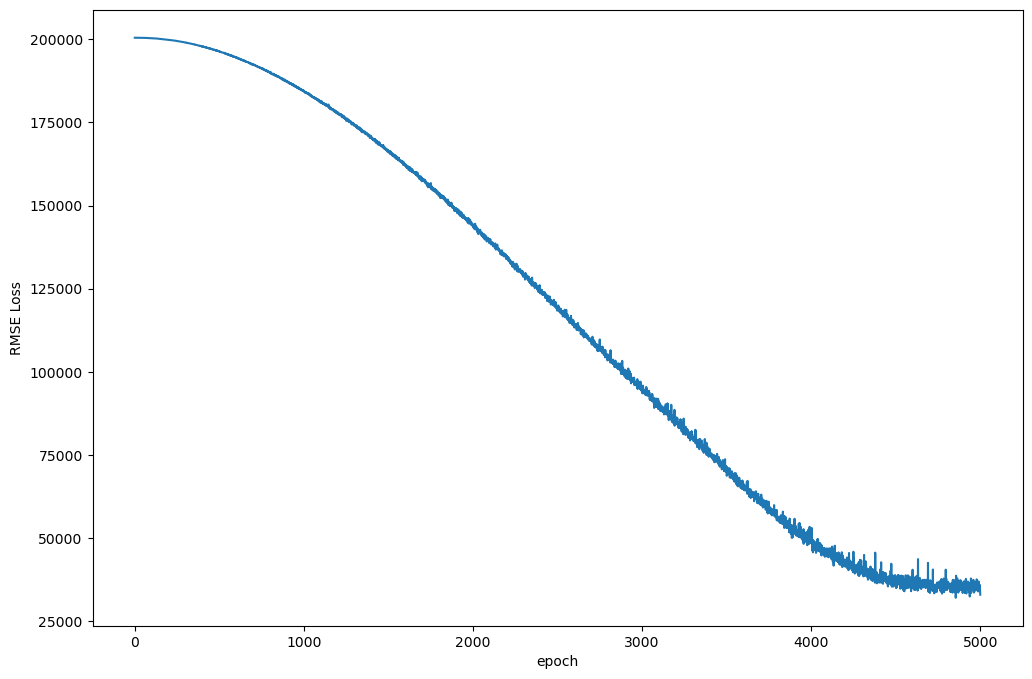

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline
# plt.fill_between(range(epochs), final_losses, alpha=0.3)
plt.figure(figsize=(12,8))
plt.plot(range(epochs),final_losses)
plt.ylabel("RMSE Loss")
plt.xlabel("epoch")
plt.show()



In [55]:
### validate the test data:
y_pred=""
with torch.no_grad():
    y_pred=model(test_categorical,test_cont)
    loss=torch.sqrt(loss_function(y_pred,y_test))
print("RMSE: {}".format(loss))
    

RMSE: 51827.828125


In [56]:
import torch

epochs = 5000
final_losses = []

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # Enable GPU if available

train_categorical, train_cont, y_train = train_categorical, train_cont, y_train

for epoch in range(1, epochs + 1):  # Start from 1
    y_pred = model(train_categorical, train_cont)  # Forward pass
    loss = loss_function(y_pred, y_train).sqrt()  # RMSE calculation

    final_losses.append(loss.item())  # Store loss efficiently

    if epoch % 100 == 0:  # Print every 100 epochs
        print(f"Epoch {epoch}/{epochs} | Loss: {loss.item():.4f}")

    optimizer.zero_grad()  # Zero gradients
    loss.backward()  # Backpropagation
    optimizer.step()  # Update weights


Epoch 100/5000 | Loss: 36062.4648
Epoch 200/5000 | Loss: 34129.4766
Epoch 300/5000 | Loss: 34477.5078
Epoch 400/5000 | Loss: 36509.7695
Epoch 500/5000 | Loss: 34544.8516
Epoch 600/5000 | Loss: 34045.2852
Epoch 700/5000 | Loss: 37265.8516
Epoch 800/5000 | Loss: 35834.0039
Epoch 900/5000 | Loss: 34893.8008
Epoch 1000/5000 | Loss: 34696.6641
Epoch 1100/5000 | Loss: 34308.9062
Epoch 1200/5000 | Loss: 36119.4375
Epoch 1300/5000 | Loss: 34217.9922
Epoch 1400/5000 | Loss: 32664.9180
Epoch 1500/5000 | Loss: 33351.5703
Epoch 1600/5000 | Loss: 33209.5859
Epoch 1700/5000 | Loss: 36930.4531
Epoch 1800/5000 | Loss: 35896.7734
Epoch 1900/5000 | Loss: 33425.6914
Epoch 2000/5000 | Loss: 33515.2852
Epoch 2100/5000 | Loss: 32947.4141
Epoch 2200/5000 | Loss: 34370.3164
Epoch 2300/5000 | Loss: 33598.1133
Epoch 2400/5000 | Loss: 34013.1016
Epoch 2500/5000 | Loss: 32292.3945
Epoch 2600/5000 | Loss: 35258.3242
Epoch 2700/5000 | Loss: 35038.2617
Epoch 2800/5000 | Loss: 34723.3398
Epoch 2900/5000 | Loss: 34364

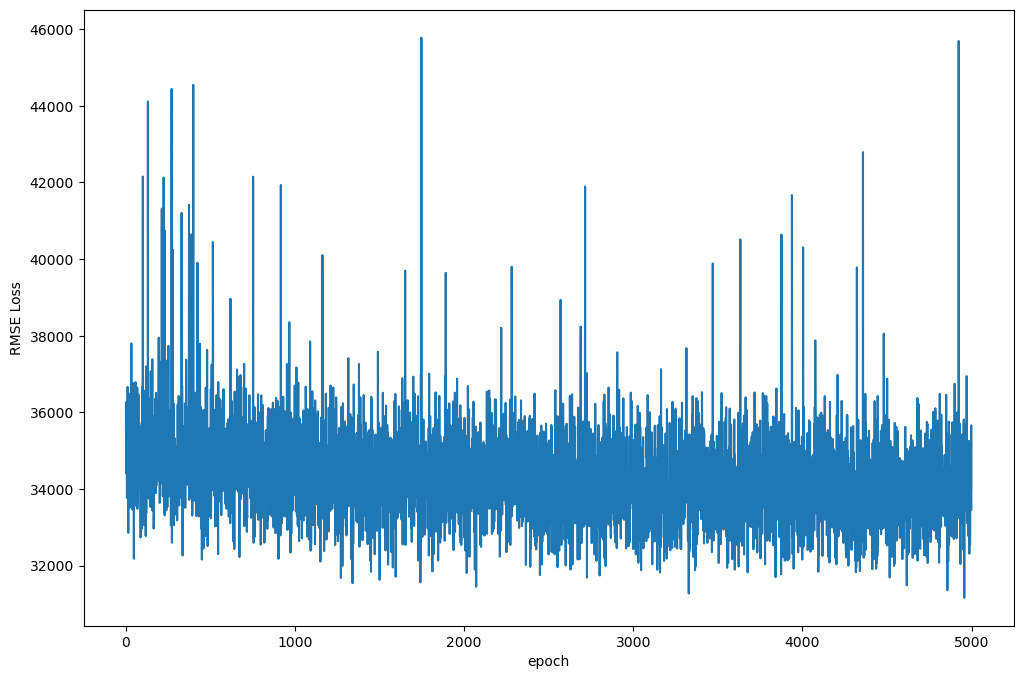

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline
# plt.fill_between(range(epochs), final_losses, alpha=0.3)
plt.figure(figsize=(12,8))
plt.plot(range(epochs),final_losses)
plt.ylabel("RMSE Loss")
plt.xlabel("epoch")
plt.show()

In [58]:
### validate the test data:
y_pred=""
with torch.no_grad():
    y_pred=model(test_categorical,test_cont)
    loss=torch.sqrt(loss_function(y_pred,y_test))
print("RMSE: {}".format(loss))
    

RMSE: 45120.99609375


In [59]:
data_verify=pd.DataFrame(y_test.tolist(),columns=["Test"])


In [60]:
data_predicted=pd.DataFrame(y_pred.tolist(),columns=["Prediction"])

In [63]:
data_verify.head()

,Test
0,130000.0
1,138887.0
2,175500.0
3,195000.0
4,142500.0


In [64]:
data_predicted.tail()

,Prediction
175,190318.37500
176,214057.65625
177,358384.90625
178,277761.12500
179,101695.25000


In [65]:
final_output=pd.concat([data_verify,data_predicted],axis=1)
final_output["Difference"]=final_output["Test"]-final_output["Prediction"]
final_output.head()

,Test,Prediction,Difference
0,130000.0,157837.968750,-27837.968750
1,138887.0,109063.460938,29823.539062
2,175500.0,166075.343750,9424.656250
3,195000.0,219950.812500,-24950.812500
4,142500.0,171223.015625,-28723.015625


In [66]:
### saving the model
torch.save(model,"HousePrice.pt")

In [67]:
torch.save(model.state_dict(),"HouseWeights.pt")

In [68]:
### loading the saved model
embs_size=[(15,8),(5,3),(2,1),(4,2)]
model1=FeedForwardNN(embs_size,5,1,[100,50],p=0.4)

In [69]:
model1.load_state_dict(torch.load("HouseWeights.pt"))

C:\Users\anshg\AppData\Local\Temp\ipykernel_5368\3955549351.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model1.load_state_dict(torch.load("HouseWeights.pt"))


<All keys matched successfully>

In [70]:
model1.eval()

FeedForwardNN(
  (embeds): ModuleList(
    (0): Embedding(15, 8)
    (1): Embedding(5, 3)
    (2): Embedding(2, 1)
    (3): Embedding(4, 2)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=19, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)